# Linear Models

In this section we are going to cover **linear models**, which are the basic structure for many data-driven models. <br>

This tutorial can be deployed in [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Notes/Coding/linear_models.ipynb)

In [7]:
# uncomment the next line to install ipywidgets
# !pip -q install ipywidgets

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Linear models

In class we covered linear equations. As we will see in the upcoming classes, linear models are the foundation to almost any regression algorithm.<br>

## Linear models 101:
$$
\begin{align}
f(x) &= \mathbf{w}^\top \mathbf{x}
 = \begin{bmatrix}
w_0 & w_1 & \cdots & w_p \\
\end{bmatrix}\begin{bmatrix}
 1 \\
 x_1 \\
 \vdots \\
 x_d
\end{bmatrix}=  \sum_{i=0}^{d} w_i x_i
\end{align} 
$$

this is merely another dot product between, the linear weights $\mathbf{w} = [b,m]$ and $\mathbf{x} = [1,x]$.

For simple **linear regression** in a single dimension, the above equation is, 
$$
\begin{align}
f(x) &= \mathbf{w}^\top \mathbf{x}
 = \begin{bmatrix}
w_0 & w_1 \\
\end{bmatrix}\begin{bmatrix}
 1 \\
 x_1 
\end{bmatrix}=  w_0 + w_1\,x = b + m\;x
\end{align} 
$$

Let's generate some random data to see if we can approximate it with a simple linear model.

Let's see a linear model under the assumption of matrix-vector multiplication.

$$
\begin{align}
\begin{bmatrix}
f(\mathbf{x}_1) \\
f(\mathbf{x}_2) \\
\vdots \\
f(\mathbf{x}_N)
\end{bmatrix} &= \begin{bmatrix}
\mathbf{w}^\top \mathbf{x}_1 \\
\mathbf{w}^\top\mathbf{x}_2 \\
\vdots \\
\mathbf{w}^\top\mathbf{x}_N
\end{bmatrix}  =  \begin{bmatrix}
\mathbf{x}_1^\top \\
\mathbf{x}_2^\top \\
\vdots \\
\mathbf{x}_N^\top \\
\end{bmatrix}\begin{bmatrix}
 w_0 \\
 w_1 
\end{bmatrix} = \begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
\vdots \\
1 & x_{N} \\
\end{bmatrix}\begin{bmatrix}
 w_0 \\
 w_1 
\end{bmatrix} = \begin{bmatrix}
w_0 + w_1\;x_{1} \\
w_0 + w_1\; x_{2} \\
\vdots \\
w_0 + w_1\;x_{N} \\
\end{bmatrix}
\end{align} 
$$


## Generate some data

In [15]:
# generate random data over f(x) = sin(x) + x - 1
def get_data(N):
    # This creates an array x of N linearly spaced values between -1 and 1.
    x = np.linspace(-1., 1., N)
    y = np.sin(.5*x) + x - 1.
    # Adds random noise to each y value.
    y = y + np.random.uniform(low=0., high=0.5, size=x.shape)
    return x, y

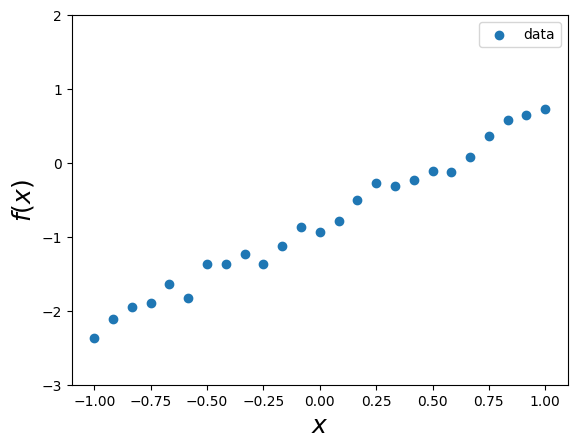

In [16]:
N = 25  # number of data points

x, y = get_data(25)

# plot
plt.scatter(x, y, label='data')
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x)$', fontsize=18)
plt.ylim(-3., 2.)
plt.legend()

## Generating Random Parameters

Later in the course, we will see how to ''train'' this family of models, but in the mean time let's use some random parameters.
For a one-dimensional model, we only need two parameters, $\mathbf{w} = [w_0,w_1] = [b,m]$, 

$$
[b,m] \sim U([-2,2])
$$
where $U$ is a random distribution between -2 and 2.

In [11]:
# random parameters
def get_random_params():
    theta_random = np.random.uniform(low=-2., high=2., size=(2, 1))
    return theta_random

In [12]:
# using the dot_product or the  function, define a function for the linear model
def linear_model(X, w):

    # code here
    y =

    return y

SyntaxError: invalid syntax (1594382655.py, line 5)

In [ ]:
w_rnd = get_random_params()
b, m = w_rnd
print('parameters')
print(w_rnd)

x_grid = np.linspace(-1., 1., 100)
X = np.column_stack((np.ones_like(x_grid), x_grid))  # add a column of ones

y_pred = linear_model(X, w_rnd)  # prediction with random parameters

print(x_grid.shape, y_pred.shape)


In [ ]:
fig, ax = plt.subplots()
ax.clear()
ax.scatter(x, y, label='data')
ax.plot(x_grid, y_pred, color='k', label='model')
ax.text(0.1, -2.5, 'w0=%.2f, w1=%.2f' % (m, b), fontsize=15)
ax.legend(loc=1)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)
ax.set_ylim(-3., 2.)

### Animation

In [17]:
# --- Minimal, Colab-friendly ipywidgets demo for linear models: y = a + b x ---

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# ---- Use your own (x, y) if already defined; otherwise create a small demo set ----
# try:
#     x, y
# except NameError:
#     rng = np.random.default_rng(0)
#     n = 60
#     x = np.linspace(-1.0, 1.0, n)
#     true_a, true_b = 0.2, -0.8
#     y = true_a + true_b * x + 0.15 * rng.standard_normal(n)

# Dense grid for the model line
x_grid = np.linspace(-1.0, 1.0, 400)
X_grid = np.column_stack([np.ones_like(x_grid), x_grid])


def linear_model(X, w):
    # w = [a, b]  -> y = a + b*x
    return X @ w

# ---- Plot function (like your draw(n=...)) ----


def draw(a=0.0, b=0.0):
    y_pred = linear_model(X_grid, np.array([a, b]))

    plt.figure(figsize=(8.5, 5.5))
    # data
    plt.scatter(x, y, label='data', alpha=0.9)
    # model line
    plt.plot(x_grid, y_pred, label='model', color='k', linewidth=2)
    # label showing current parameters (matches your w0/w1 style)
    plt.text(0.7, 0.05, f"b={a:.2f}, m={b:.2f}",
             transform=plt.gca().transAxes, fontsize=16)

    plt.xlabel(r"$x$", fontsize=16)
    plt.ylabel(r"$f(x)$", fontsize=16)
    plt.ylim(min(y.min(), y_pred.min()) - 0.5,
             max(y.max(), y_pred.max()) + 0.5)
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()


# ---- Widgets: only a and b ----
interact(
    draw,
    a=FloatSlider(value=0.0, min=-2.5, max=2.5, step=0.01, description="b"),
    b=FloatSlider(value=0.0, min=-2.5, max=2.5, step=0.01, description="m"),
)

interactive(children=(FloatSlider(value=0.0, description='b', max=2.5, min=-2.5, step=0.01), FloatSlider(value…

<function __main__.draw(a=0.0, b=0.0)>